In [3]:
  
#import the files 
import re 
import nltk
import ssl
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
#from sklearn.metrics import f1_Score

cv = CountVectorizer()
train_data_2 = pd.read_csv('training_set.csv')
test_data = pd.read_csv('testing_set.csv')


X_train = cv.fit_transform(train_data_2["Review"]).toarray()
y_train = train_data_2["Liked"].values
X_test = cv.transform(test_data["Review"]).toarray()
y_test = test_data["Liked"].values



#(X, y) = (features matrix, labels)
maxent = linear_model.LogisticRegression(penalty = 'l2', C=1.0)
maxent.fit(X_train, y_train)
#print (maxent.coef_)
#Matrix with shape (n classes, n features)

#predict vector with (integer) labels
y_predicted = maxent.predict(X_test)
test_accuracy = accuracy_score(y_test, y_predicted)


# probability distribution over all possible classes
# Shape: (n_instances, n_classes)
y_probs = maxent.predict_proba(X_test)
score2 = precision_score(y_test,y_predicted)
score3= recall_score(y_test,y_predicted)
print("\n")
print("Accuracy is ",round(test_accuracy*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
print("\n")

#confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)



Accuracy is  78.67 %
Precision is  0.83
Recall is  0.76


Confusion Matrix:
 [[110  25]
 [ 39 126]]


In [4]:
#final
business = pd.read_csv("final_business.csv")
reviews = pd.read_csv("cleanish_reviews.csv")
ids = pd.read_csv('list_buiss_id.txt', sep = " ", header = None)
ids.columns = ["id"]

In [5]:
columns = ["business_id", "business_name", "our_score", "stars"]
results = pd.DataFrame(columns = columns)

In [6]:
for i in range(len(ids)):
    id_curr = ids.iloc[i].id

    all_reviews = reviews[reviews["business_id"]== id_curr]

    X_test = cv.transform(all_reviews["text"]).toarray()

    y_pred = maxent.predict(X_test)

    y_pred = np.mean(y_pred) * 100

    curr_buis = business.loc[business["business_id"]== id_curr]

    curr_star = (curr_buis["stars"].values[0]/5)*100

    results = results.append({"business_id":id_curr, "business_nanme":curr_buis["name"].values[0],"our_score":y_pred, "stars":curr_star}, ignore_index = True)

In [7]:
results.head()

,business_id,business_name,our_score,stars,business_nanme
0,s2B_ZeSGTlQ3qbm0dOY5rg,NaN,51.351351,60.0,Hwy 55 Burgers Shakes & Fries
1,tYYJYqbw1zasFUCqrkawKQ,NaN,68.055556,70.0,Eagles Buffet
2,wtDLILBaj5BGEbYvWGfNUw,NaN,86.666667,80.0,Duck Donuts
3,Mnu3EPpuzu3UUN1PIwFRoQ,NaN,94.230769,90.0,Maui Pasta
4,MrSHPvHVdE_VzVN7iRz45Q,NaN,65.797101,70.0,Enso Asian Bistro & Sushi Bar


In [8]:
ss.pearsonr(results["our_score"], results["stars"])

(0.8511565046734014, 3.4837737606572594e-29)

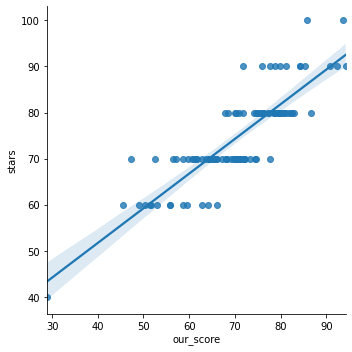

In [9]:
g = sns.lmplot(x="our_score", y ="stars", data = results)

In [10]:
results.filter(items = ["our_score", 'stars']).corr()

,our_score,stars
our_score,1.000000,0.851157
stars,0.851157,1.000000
